In [436]:
import pandas as pd 

In [437]:
df = pd.read_csv(r'/Users/lucasmoura/Library/Mobile Documents/com~apple~CloudDocs/projetos_py/study/preditiva/customer_segmentation_data.csv')

In [438]:
#Colunas:
#id: Identificador exclusivo para cada cliente.
#age: Idade do cliente.
#gender: Sexo do cliente (Masculino, Feminino, Outro).
#income: Renda anual do cliente (em USD).
#spending_score: Pontuação de gastos (1-100), indicando o comportamento de gastos e a fidelidade do cliente.
#membership_years: Número de anos em que o cliente é membro.
#purchase_frequency: Número de compras feitas pelo cliente no último ano.
#preferred_category: Categoria de compras preferida (Eletrônicos, Roupas, Mercearia, Casa e Jardim, Esportes).
#last_purchase_amount: Valor gasto pelo cliente em sua última compra (em USD).
#Usos potenciais:
#Segmentação de clientes: Identifique diferentes segmentos de clientes com base em suas características demográficas e comportamentais.
#Marketing direcionado: Desenvolva estratégias de marketing direcionadas para diferentes segmentos de clientes.
#Programas de fidelidade do cliente: Crie programas de fidelidade com base no comportamento de gastos e preferências do cliente.
#Análise de vendas: Analise padrões de vendas e preveja tendências futuras.

In [439]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [440]:
print(df.size)
print(df.shape)

9000
(1000, 9)


In [441]:
df.columns

Index(['id', 'age', 'gender', 'income', 'spending_score', 'membership_years',
       'purchase_frequency', 'preferred_category', 'last_purchase_amount'],
      dtype='object')

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


Verificando os dados

In [443]:
# amplitude da idade 

print(f'a idade minima é: {df['age'].min()}')
print(f'a idade máxima é: {df['age'].max()}')
print(f'a amplitudade da idade é: {  df['age'].max() - df['age'].min()}')
print(f'média de idade: {df['age'].mean()}')
print(f'mediana da idade: {df['age'].median()}')

a idade minima é: 18
a idade máxima é: 69
a amplitudade da idade é: 51
média de idade: 43.783
mediana da idade: 45.0


In [444]:
#verificando a distribuição por idade
df['age'].value_counts(bins=10, normalize=True).mul(100).sort_index(ascending=True).to_frame()

,proportion
"(17.948, 23.1]",12.0
"(23.1, 28.2]",8.4
"(28.2, 33.3]",11.5
"(33.3, 38.4]",6.8
"(38.4, 43.5]",9.3
"(43.5, 48.6]",11.2
"(48.6, 53.7]",9.9
"(53.7, 58.8]",9.1
"(58.8, 63.9]",10.5
"(63.9, 69.0]",11.3


In [445]:
#distribuição de genero
df['gender'].value_counts(normalize=True).sort_values(ascending=False).mul(100)

gender
Male      35.7
Other     32.7
Female    31.6
Name: proportion, dtype: float64

In [ ]:
# categorias preferidas por genero
df.groupby(['gender', 'preferred_category'])['id'].size().to_frame().reset_index()

,gender,preferred_category,id
0,Female,Clothing,56
1,Female,Electronics,65
2,Female,Groceries,66
3,Female,Home & Garden,68
4,Female,Sports,61
5,Male,Clothing,56
6,Male,Electronics,76
7,Male,Groceries,71
8,Male,Home & Garden,77
9,Male,Sports,77


In [447]:
#verificando a distribuição da categoria de compra favorita por sexo

categoria_sexo = df.groupby(['gender', 'preferred_category'])['id'].size().to_frame().reset_index()

pd.crosstab(categoria_sexo['preferred_category'], categoria_sexo['gender'], normalize='index', margins=True, margins_name='Total').mul(100)

gender,Female,Male,Other
preferred_category,,,
Clothing,33.333333,33.333333,33.333333
Electronics,33.333333,33.333333,33.333333
Groceries,33.333333,33.333333,33.333333
Home & Garden,33.333333,33.333333,33.333333
Sports,33.333333,33.333333,33.333333
Total,33.333333,33.333333,33.333333


In [448]:
#frequencia de membro
df['membership_years'].value_counts(normalize=True).mul(100).sort_index()

membership_years
1      9.5
2     10.9
3      9.5
4      9.4
5     12.5
6      9.6
7      9.4
8      8.8
9     10.8
10     9.6
Name: proportion, dtype: float64

In [449]:
#verificando idade por bin
df['age'].value_counts(bins=10, normalize=True).mul(100).sort_index(ascending=True).to_frame()

,proportion
"(17.948, 23.1]",12.0
"(23.1, 28.2]",8.4
"(28.2, 33.3]",11.5
"(33.3, 38.4]",6.8
"(38.4, 43.5]",9.3
"(43.5, 48.6]",11.2
"(48.6, 53.7]",9.9
"(53.7, 58.8]",9.1
"(58.8, 63.9]",10.5
"(63.9, 69.0]",11.3


In [450]:
#criando faixa de idade
df['faixa_idade'] = pd.cut(df['age'], bins=10)

In [451]:
#transformando a renda anual em float
df['income'] = df['income'].astype(float)

In [453]:
# renda por faixa de idade

df.groupby('faixa_idade')['income'].sum().sort_values(ascending=False).to_frame()

/var/folders/50/_d6n383x6h5dx753pztm95pc0000gn/T/ipykernel_30646/962341339.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('faixa_idade')['income'].sum().sort_values(ascending=False).to_frame()


,income
faixa_idade,
"(17.949, 23.1]",10839002.0
"(63.9, 69.0]",9974730.0
"(43.5, 48.6]",9951460.0
"(28.2, 33.3]",9802415.0
"(58.8, 63.9]",9334098.0
"(48.6, 53.7]",8877468.0
"(53.7, 58.8]",8240909.0
"(38.4, 43.5]",8054461.0
"(23.1, 28.2]",7705956.0


In [ ]:
#verificando se há clientes repetidos ou que fizeram mais de uma compra
df['id'].value_counts(ascending=False)

id
1       1
672     1
659     1
660     1
661     1
       ..
339     1
340     1
341     1
342     1
1000    1
Name: count, Length: 1000, dtype: int64

In [456]:
#categoria que mais recebeu dinheiro na ultima compra de cada cliente

df.groupby('preferred_category')['last_purchase_amount'].sum().to_frame().reset_index()

,preferred_category,last_purchase_amount
0,Clothing,83240.23
1,Electronics,106775.94
2,Groceries,96968.60
3,Home & Garden,104153.73
4,Sports,101210.17


Valor gasto na ultima compra do cliente por categoria

In [457]:
ult_compra = df.groupby('preferred_category', as_index=False)['last_purchase_amount'].sum().sort_values(by='last_purchase_amount',ascending=False)

In [458]:
ult_compra

,preferred_category,last_purchase_amount
1,Electronics,106775.94
3,Home & Garden,104153.73
4,Sports,101210.17
2,Groceries,96968.60
0,Clothing,83240.23


# Analise gráfica

/var/folders/50/_d6n383x6h5dx753pztm95pc0000gn/T/ipykernel_30646/1928238611.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barras = sns.barplot(x=ult_compra['preferred_category'], y=ult_compra['last_purchase_amount'],palette='plasma')


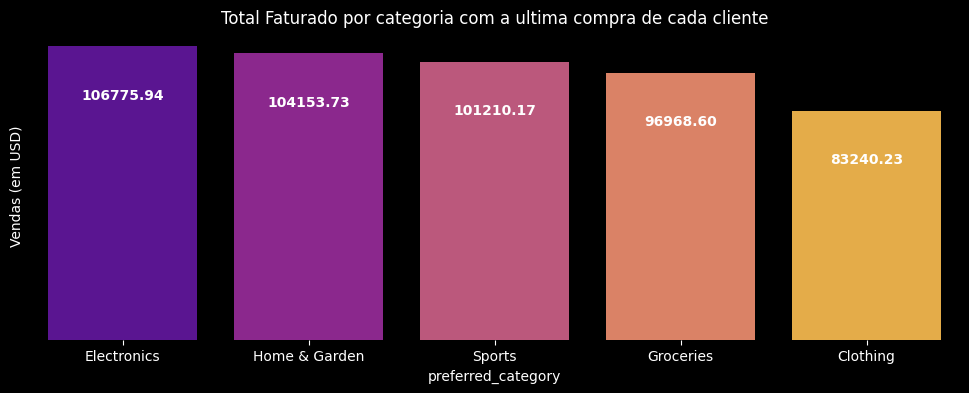

In [459]:
# Total Faturado na ultima compra por cada cliente

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,4))

barras = sns.barplot(x=ult_compra['preferred_category'], y=ult_compra['last_purchase_amount'],palette='plasma')

for container in barras.containers:
    barras.bar_label(container, fmt='{:.2f}', fontweight = 'bold', padding=-40, color='white')

plt.style.use('dark_background')

plt.ylabel('Vendas (em USD)') #eixo y
plt.title('Total Faturado por categoria com a ultima compra de cada cliente')

plt.yticks([])
plt.box(False)
plt.show();

# Categoria por cliente

In [460]:
#categoria preferida pelos clientes

df.groupby('preferred_category')['id'].size().to_frame().reset_index().sort_values(by='id', ascending=False)

,preferred_category,id
1,Electronics,215
4,Sports,210
3,Home & Garden,206
2,Groceries,199
0,Clothing,170


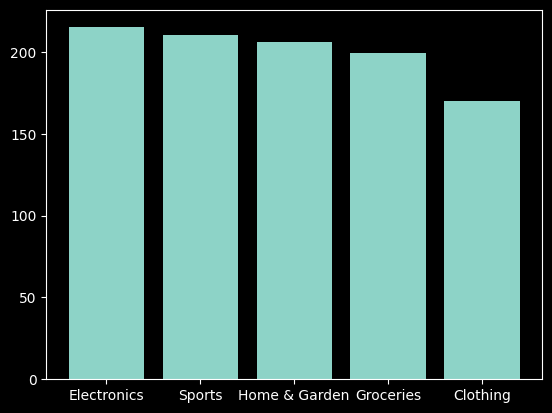

In [461]:
cat_preferida = df.groupby('preferred_category')['id'].size().to_frame().reset_index().sort_values(by='id', ascending=False)

plt.bar(cat_preferida['preferred_category'], cat_preferida['id'])
plt.show()

# Categoria mais gasta por renda anual

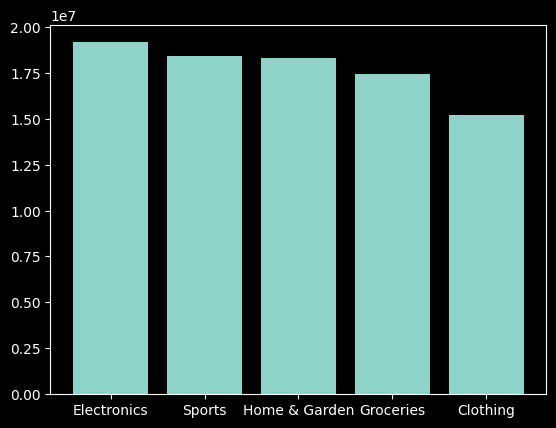

In [462]:
#categorias mais gasta

cat_gasta = df.groupby('preferred_category')['income'].sum().to_frame().reset_index().sort_values(by='income', ascending=False)
plt.bar(cat_gasta['preferred_category'], cat_gasta['income'])
plt.show()


os clientes com maior score são os que mais compram?
Correlação entre pontos e compras 

Correlação entre pontos e compras totais: 0.01
Valor-p: 0.8322
⚠️ Não há correlação estatisticamente significativa.


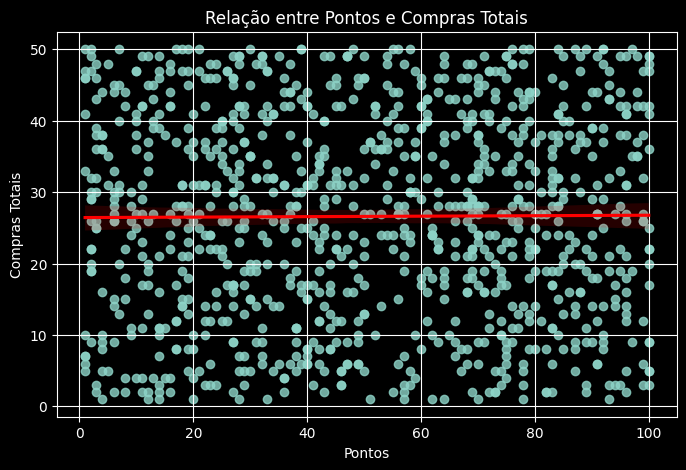

In [463]:
from scipy.stats import pearsonr

# Exemplo de DataFrame (substitua pelos seus dados reais)

df[['spending_score','purchase_frequency']]

# 1. Calcular correlação de Pearson
correlacao, p_valor = pearsonr(df['spending_score'], df['purchase_frequency'])

# 2. Exibir resultado
print(f"Correlação entre pontos e compras totais: {correlacao:.2f}")
print(f"Valor-p: {p_valor:.4f}")

if p_valor < 0.05:
    print("✅ Existe uma correlação estatisticamente significativa.")
    if correlacao > 0:
        print("📈 Clientes com mais pontos tendem a comprar mais.")
    elif correlacao < 0:
        print("📉 Clientes com mais pontos tendem a comprar menos.")
else:
    print("⚠️ Não há correlação estatisticamente significativa.")

# 3. Visualizar com gráfico
plt.figure(figsize=(8, 5))
sns.regplot(x='spending_score', y='purchase_frequency', data=df, line_kws={"color": "red"})
plt.title('Relação entre Pontos e Compras Totais')
plt.xlabel('Pontos')
plt.ylabel('Compras Totais')
plt.grid(True)
plt.show()

# Produtos Mais consumidos por tempo de cadastro

In [ ]:
tabela = df.groupby(['membership_years','preferred_category'])['id'].size().to_frame().reset_index()

import sqlite3 as sql

conn = sql.connect('tabela.db')

# Cria a tabela 'minha_tabela' e insere os dados do DataFrame
tabela.to_sql('cadastro_categorias', conn, if_exists='replace', index=False)
cursor = conn.cursor()

In [467]:
# 4. Cria o DataFrame
analise_1 = pd.read_sql_query(
    '''
    with x as
    (
    SELECT distinct
        membership_years,
        preferred_category,
        max(id) maximo 
    FROM cadastro_categorias
    group by 1
    )
    select 
        *
    from x 
    order by 1,2
               ''' , conn)

# 5. Mostra o DataFrame
analise_1

,membership_years,preferred_category,maximo
0,1,Clothing,21
1,2,Groceries,28
2,3,Electronics,24
3,4,Sports,23
4,5,Home & Garden,33
5,6,Home & Garden,24
6,7,Electronics,27
7,8,Sports,21
8,9,Electronics,24
9,10,Electronics,27


# Produtos mais consumidos por faixa de idade

In [471]:
df['faixa_idade'] = df['faixa_idade'].astype(str)  ## ajustar isso

In [474]:
tabelax = df.groupby(['faixa_idade','preferred_category'])['id'].size().to_frame().reset_index()

conn = sql.connect('tabelax.db')
tabelax.to_sql('idade_categoria', conn, if_exists='replace', index=False)
cursor = conn.cursor()

In [477]:
# 4. Cria o DataFrame
analise_2 = pd.read_sql_query(
    '''
    with x as
    (
    SELECT distinct
        faixa_idade,
        preferred_category,
        max(id) maximo 
    FROM idade_categoria
    group by 1
    )
    select 
        *
    from x 
    order by 1,2
               ''' , conn)

# 5. Mostra o DataFrame
analise_2

,faixa_idade,preferred_category,maximo
0,"(17.949, 23.1]",Electronics,31
1,"(23.1, 28.2]",Groceries,21
2,"(28.2, 33.3]",Sports,27
3,"(33.3, 38.4]",Sports,17
4,"(38.4, 43.5]",Groceries,23
5,"(43.5, 48.6]",Home & Garden,29
6,"(48.6, 53.7]",Home & Garden,22
7,"(53.7, 58.8]",Electronics,26
8,"(58.8, 63.9]",Sports,24
9,"(63.9, 69.0]",Sports,26


# mosaico

In [494]:
from cycler import cycler
from scipy.stats import pearsonr

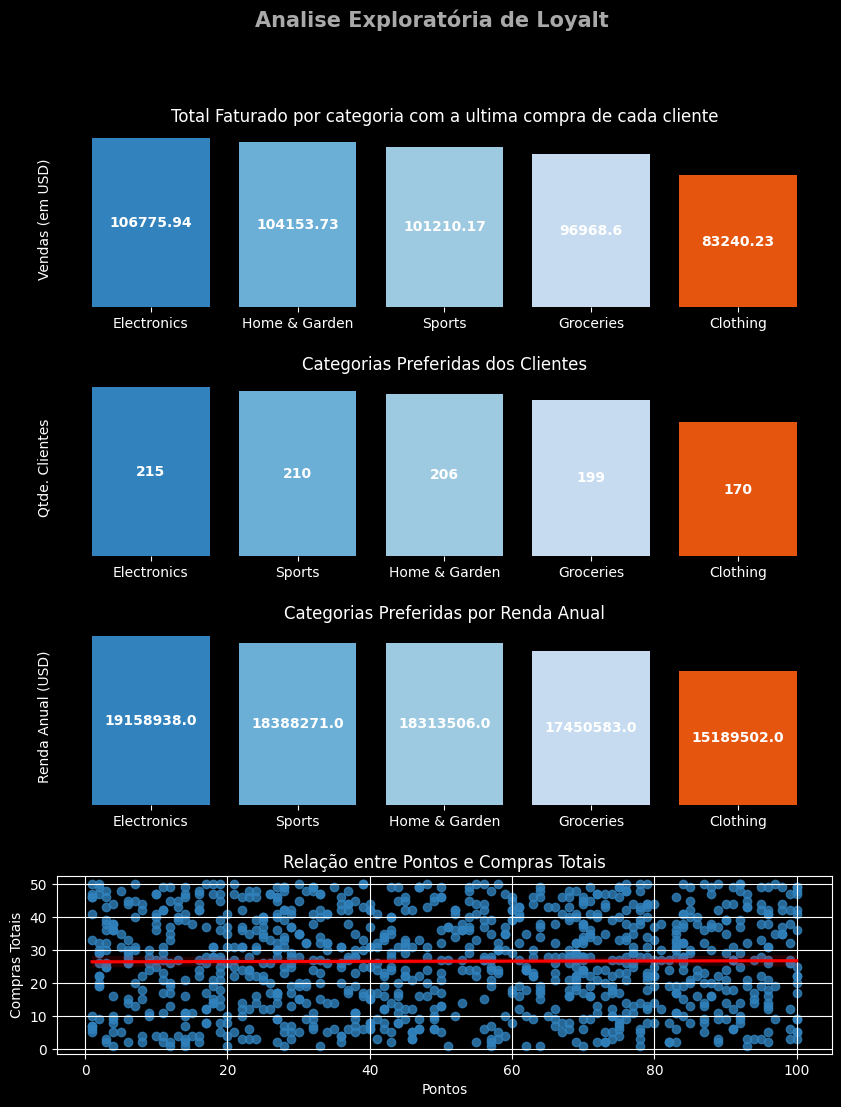

In [504]:
mosaico = 'AA;BB;CC;DD'

plt.style.use('dark_background')

cores = plt.get_cmap('tab20c').colors 
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

fig = plt.figure(figsize=(10,12))
espacamento = {'wspace': 0.3, 'hspace': 0.4}
axs = fig.subplot_mosaic(mosaico,gridspec_kw=espacamento)

grafico1 = axs['A'].bar(ult_compra['preferred_category'],ult_compra['last_purchase_amount'],color=cores)
axs['A'].bar_label(grafico1,labels=ult_compra['last_purchase_amount'],label_type='center', fontweight= 'bold',color='white')

#barras = sns.barplot(x=ult_compra['preferred_category'], y=ult_compra['last_purchase_amount'],palette='plasma')

for container in barras.containers:
    barras.bar_label(container, fmt='{:.2f}', fontweight = 'bold', padding=-40, color='white')

axs['A'].set_yticks([]) #retirando o eixo y
axs['A'].set_ylabel('Vendas (em USD)') #titulo
axs['A'].set_title('Total Faturado por categoria com a ultima compra de cada cliente') #colocando o titulo
axs['A'].set_frame_on(False) #retira as bordas do gráficos com POO


cat_preferida = df.groupby('preferred_category')['id'].size().to_frame().reset_index().sort_values(by='id', ascending=False)

grafico2 = axs['B'].bar(cat_preferida['preferred_category'], cat_preferida['id'],color=cores)
axs['B'].bar_label(grafico2,labels=cat_preferida['id'],label_type='center', fontweight= 'bold',color='white')

axs['B'].set_yticks([]) #retirando o eixo y
axs['B'].set_ylabel('Qtde. Clientes') #titulo
axs['B'].set_title('Categorias Preferidas dos Clientes') #colocando o titulo
axs['B'].set_frame_on(False) #retira as bordas do gráficos com POO

cat_gasta = df.groupby('preferred_category')['income'].sum().to_frame().reset_index().sort_values(by='income', ascending=False)
grafico3 = axs['C'].bar(cat_gasta['preferred_category'], cat_gasta['income'],color=cores)
axs['C'].bar_label(grafico3,labels=cat_gasta['income'],label_type='center', fontweight= 'bold',color='white')

axs['C'].set_yticks([]) #retirando o eixo y
axs['C'].set_ylabel('Renda Anual (USD)') #titulo
axs['C'].set_title('Categorias Preferidas por Renda Anual') #colocando o titulo
axs['C'].set_frame_on(False) #retira as bordas do gráficos com POO

df[['spending_score','purchase_frequency']]

correlacao, p_valor = pearsonr(df['spending_score'], df['purchase_frequency'])

sns.regplot(x='spending_score', y='purchase_frequency', data=df,ax=axs['D'], line_kws={"color": "red"})
axs['D'].set_title('Relação entre Pontos e Compras Totais')
axs['D'].set_xlabel('Pontos')
axs['D'].set_ylabel('Compras Totais')
axs['D'].grid(True)

fig.suptitle('Analise Exploratória de Loyalt', fontsize=15, fontweight='bold', color='darkgray')

plt.show()
